In [1]:
%matplotlib inline

# EyepadAlign

A class to align face images based on eye location.

> from mlxtend.image import EyepadAlign

## Overview

The `EyepadAlign` class align face images to target face landmarks based on the location of the eyes. The facial landmarks are detected using [`mlxted.image.extract_face_landmarks`](extract_face_landmarks.md), which is based on dlib's face landmark detection [code](http://dlib.net/face_landmark_detection_ex.cpp.html) [1].

`EyepadAlign` implements 3 fit methods, `fit_image`, `fit_values`, and `fit_directory`; once the `EyepadAlign` object has been fitted via one of these methods (as illustrated in the examples), it can be used to transform a target image.



### References

- [1] Kazemi, Vahid, and Josephine Sullivan. "One millisecond face alignment with an ensemble of regression trees." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2014.

## Example 1 (fit_image)

This example illustrates the use of EyepadAlign fit to a **single** target input image (first image in the [CelebA dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)) to the canonical computer vision benchmark image Lena such that the eye position is in the same scale and location as the target image.

In [2]:
import imageio
from mlxtend.image import EyepadAlign


### Fit EyepadAlign on a single target image

eyepad = EyepadAlign()
target_image = imageio.imread('celeba-subset/000001.jpg')
print('Target image shape: ', target_image.shape)

eyepad.fit_image(target_image);

Target image shape:  (218, 178, 3)


In [3]:
### Transform a test image


img = imageio.imread('test-face.png')
print('Original Image shape: ', img.shape)

img_tr = eyepad.transform(img)
print('Transformed Image shape: ', img_tr.shape)

Original Image shape:  (350, 350, 3)
Transformed Image shape:  (218, 178, 3)


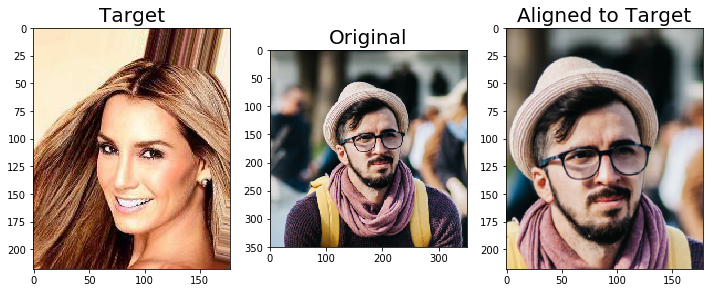

In [4]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(target_image)
ax.set_title('Target', size=20)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(img)
ax.set_title('Original', size=20)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_tr)
ax.set_title('Aligned to Target', size=20)
plt.show()

## Example 2 (fit_directory)

In typical computer vision and deep learning tasks, we are interested in aligning all images in a dataset and across dataset to allow cross-dataset comparisons of face image classifiers.

Using the `fit_directory` method, we can fit `EyepadAlign` such that the average landmarks are computed from all images in a directory. Then, we can use these average landmarks to transform new images based on the average eye location.

In [5]:
import imageio
from mlxtend.image import EyepadAlign


### Setting verbosity to 1 will print a progress bar
eyepad = EyepadAlign(verbose=1)

eyepad.fit_directory(target_img_dir='celeba-subset/',
                     target_width=178, target_height=218,
                     file_extension='.jpg')

img = imageio.imread('test-face.png')
img_tr = eyepad.transform(img)
print('Transformed Image shape: ', img_tr.shape)

Fitting the average facial landmarks for 9 face images 


0% [#####    ] 100% | ETA: 00:00:00/Users/sebastian/code/mlxtend/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')
/Users/sebastian/code/mlxtend/mlxtend/image/eyepad_align.py:160: UserWarning: No face detected in image 000004.jpg. Image ignored.
  % f)
0% [#########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
/Users/sebastian/code/mlxtend/mlxtend/image/eyepad_align.py:160: UserWarning: No face detected in image 000003.jpg. Image ignored.
  % f)


Transformed Image shape:  (218, 178, 3)


Note that a warning is displayed if no face landmarks could be detected. In these cases, the image is skipped and not included in the average landmark computation. E.g., 000003.jpg would be such an example:

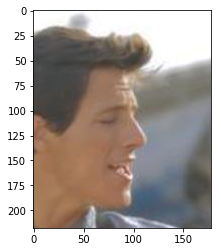

In [6]:
import matplotlib.pyplot as plt

img_no_landmarks = imageio.imread('celeba-subset/000003.jpg')
plt.imshow(img_no_landmarks)
plt.show()

Finally, the an example of aligning the original Lena image to the average landmarks in the dataset is shown below:

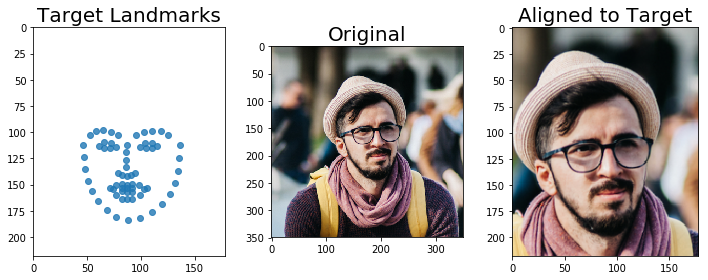

In [7]:
fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(1, 3, 1)
ax.scatter(eyepad.target_landmarks_[:, 0], eyepad.target_landmarks_[:, 1], alpha=0.8)
ax.set_title('Target Landmarks', size=20)
ax.set_xlim(0, 178)
ax.set_ylim(218, 0)


ax = fig.add_subplot(1, 3, 2)
ax.imshow(img)
ax.set_title('Original', size=20)

ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_tr)
ax.set_title('Aligned to Target', size=20)

plt.tight_layout()
plt.show()

## Example 3 (fit_values)


For more customization, landmarks can also be passed manually.

In [8]:
import imageio
from mlxtend.image import EyepadAlign
import numpy as np

celeba_landmarks = np.array([[45, 113], [45, 124], [46, 136],
                             [49, 147], [53, 158], [60, 167],
                             [68, 175], [77, 182], [88, 184],
                             [99, 182], [108, 175], [117, 167],
                             [124, 158], [128, 147], [131, 136],
                             [132, 124], [132, 113], [53, 104],
                             [58,  99], [66,  98], [73,  99],
                             [80, 102], [95, 102], [103,  99],
                             [110,  98], [118,  99], [123, 104],
                             [88, 111], [88, 119], [88, 126],
                             [88, 134], [79, 139], [83, 140],
                             [88, 142], [92, 140], [96, 139],
                             [62, 112], [66, 109], [72, 109],
                             [77, 113], [71, 114], [66, 114],
                             [99, 113], [104, 109], [110, 109],
                             [115, 112], [110, 114], [105, 114],
                             [71, 152], [77, 150], [83, 149],
                             [88, 150], [92, 149], [99, 150],
                             [105, 152], [99, 159], [93, 162],
                             [88, 163], [83, 162], [77, 159],
                             [73, 153], [83, 152], [88, 153],
                             [93, 152], [103, 153], [93, 156],
                             [88, 157], [83, 156]])



eyepad = EyepadAlign(verbose=1)

eyepad.fit_values(target_landmarks=celeba_landmarks,
                     target_width=178, target_height=218);

Transformed Image shape:  (218, 178, 3)


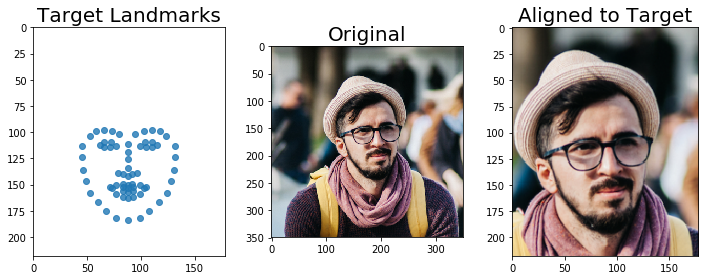

In [9]:
import matplotlib.pyplot as plt


img = imageio.imread('test-face.png')
img_tr = eyepad.transform(img)
print('Transformed Image shape: ', img_tr.shape)

fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(1, 3, 1)
ax.scatter(eyepad.target_landmarks_[:, 0], eyepad.target_landmarks_[:, 1], alpha=0.8)
ax.set_title('Target Landmarks', size=20)
ax.set_xlim(0, 178)
ax.set_ylim(218, 0)


ax = fig.add_subplot(1, 3, 2)
ax.imshow(img)
ax.set_title('Original', size=20)

ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_tr)
ax.set_title('Aligned to Target', size=20)

plt.tight_layout()
plt.show()

## Example 4 (centering the nose)

In many applications that involve center-cropping, it is helpful to translate the image such that the tip of the nose is located in the center of the image.

In [10]:
### Fit EyepadAlign to dataset to compute average landmarks

import imageio
from mlxtend.image import EyepadAlign
import numpy as np

eyepad = EyepadAlign(verbose=1)

eyepad.fit_directory(target_img_dir='celeba-subset/',
                     target_width=178, target_height=218,
                     file_extension='.jpg')

Fitting the average facial landmarks for 9 face images 


0% [#####    ] 100% | ETA: 00:00:00/Users/sebastian/code/mlxtend/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')
/Users/sebastian/code/mlxtend/mlxtend/image/eyepad_align.py:160: UserWarning: No face detected in image 000004.jpg. Image ignored.
  % f)
0% [#########] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
/Users/sebastian/code/mlxtend/mlxtend/image/eyepad_align.py:160: UserWarning: No face detected in image 000003.jpg. Image ignored.
  % f)


In [11]:
### Use the calculated landmarks to center the nose:
center = np.array([178//2, 218//2])
displacement_vector = center - eyepad.target_landmarks_[33] # index 33 is the nose-tip

nose_centered_landmarks = eyepad.target_landmarks_ + displacement_vector

eyepad_cent_nose = EyepadAlign(verbose=1)

eyepad_cent_nose.fit_values(target_landmarks=nose_centered_landmarks,
                             target_width=178, target_height=218);

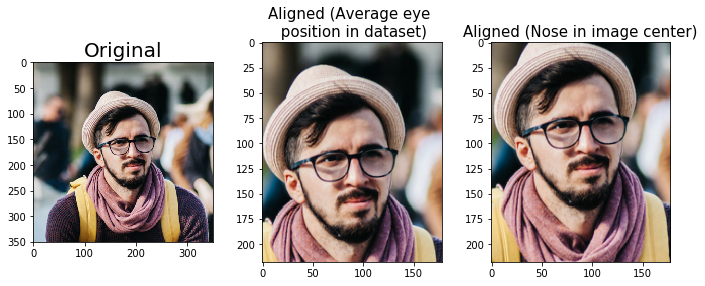

In [12]:
### Evaluate the results

img = imageio.imread('test-face.png')
img_tr = eyepad.transform(img)
img_nose_centered = eyepad_cent_nose.transform(img)


fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('Original', size=20)

ax = fig.add_subplot(1, 3, 2)
ax.imshow(img_tr)
ax.set_title('Aligned (Average eye \n position in dataset)', size=15)

ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_nose_centered)
ax.set_title('Aligned (Nose in image center)', size=15)

plt.tight_layout()
plt.show()

## API

In [13]:
with open('../../api_modules/mlxtend.image/EyepadAlign.md', 'r') as f:
    print(f.read())

## EyepadAlign

*EyepadAlign(verbose=0)*

Class to align/transform face images to facial landmarks,
based on eye alignment.

1. A scaling factor is computed based on distance between the
left and right eye, such that the transformed face image will
have the same eye distance as a reference face image.

2. A transformation is performed based on the eyes' center point.
to align the face based on the reference eye location.

3. Finally, the transformed image is padded with zeros to match
the desired final image size.

**Parameters**

- `verbose` : int (default=0)

    Verbose level to display the progress bar and log messages.
    Setting `verbose=1` will print a progress bar upon calling
    `fit_directory`.

**Attributes**

- `target_landmarks_` : target landmarks to transform new face images to.

    Depending on the chosen `fit` parameters, it can  be either
    (1) assigned to pre-fit shapes,
    (2) computed from a single face image
    (3) computed as the mean of face landmarks
   